# Read me

This code should be run as "Run all" at once <br>

BEFORE RUNNING THE CODE: The dataset was too big to be uploaded on GitHub. We tried to use requests, but it did not work.
Please, before running this code, please download the zip file from this url: https://www.kaggle.com/sogun3/uspollution/downloads/uspollution.zip/1 and paste the zip file in the same folder as this code is. No need to unzip the file.


## Summary
Dataset<br>
Reference for methodology<br>
1) Accessing data using pandas<br>
2) Integration of EPA categories in the dataset<br>
3) Plots<br>


# Dataset
Pollution in US open dataset: https://www.kaggle.com/sogun3/uspollution

# Reference for methodology:

## Air Quality Index (AQI) Basics, EPA
https://cfpub.epa.gov/airnow/index.cfm?action=aqibasics.aqi <br>
0 to 50	Good	
51 to 100	Moderate	
101 to 150	Unhealthy for Sensitive Groups	
151 to 200	Unhealthy	
201 to 300	Very Unhealthy	
301 to 500	Hazardous	

In [1]:
#Importing libraries
import requests
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math
import warnings
from collections import OrderedDict

#Importing .py files: 
from make_plots import *
from my_methods import *
%matplotlib inline

In [2]:
# OPEN ZIPFILE
# url = "https://www.kaggle.com/sogun3/uspollution/downloads/uspollution.zip/1"
# filename = url.split("/")[-1]
# with open(filename, "wb") as f:
#     r = requests.get(url)
#     f.write(r.content)

with zipfile.ZipFile('uspollution.zip') as zfile:
    with zfile.open('pollution_us_2000_2016.csv') as myZip:
        df = pd.read_csv(myZip) 

# 1) Accessing data using pandas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
Unnamed: 0           int64
State Code           int64
County Code          int64
Site Num             int64
Address              object
State                object
County               object
City                 object
Date Local           object
NO2 Units            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour     int64
NO2 AQI              int64
O3 Units             object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour      int64
O3 AQI               int64
SO2 Units            object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour     int64
SO2 AQI              float64
CO Units             object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour      int64
CO AQI               float64
dtypes: float64(10), int64(10), object(9)
memory usage: 386.5+ MB


In [4]:
df.head(5)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


# 2) Integration of EPA categories in the dataset

In [5]:
all_air = []
AQIs = ['NO2 AQI', 'O3 AQI', 'CO AQI', 'SO2 AQI']
for entry in AQIs:
    reshaped_data = reshape_data(df, entry, (1, len(df.index)))
    all_air.append(reshaped_data)
    
all_air = np.nan_to_num(np.array(all_air))
max_AQI = np.nanmax(all_air, axis = 0)

df["MAX_AQI"] = pd.DataFrame(max_AQI) 
df['EPA'] = 'm'

In [6]:
lower_bounds = [0, 50, 100, 150, 200, 300]
upper_bounds = [50, 100, 150, 200, 300, 500]
classifications = ["Good", "Moderate", "Unhealthy for Sensitive Groups",
                   "Unhealthy", "Very Unhealthy", "Hazardous"]
for i, [lb, ub] in enumerate(zip(lower_bounds, upper_bounds)):
    classify_air_quality(df, lb, ub, classifications[i])
    
df.groupby(['EPA'])['EPA'].count()

EPA
Good                              1482671
Moderate                           225287
Unhealthy                            3722
Unhealthy for Sensitive Groups      34707
Very Unhealthy                        274
Name: EPA, dtype: int64

# 3 Plots

## 3.1 States with highest average AQI 2011-2015

In [7]:
df['Date Local'] = pd.to_datetime(df['Date Local'])

#filter the data from 2011-2015
ydf = df[(df['Date Local'].dt.year <= 2015) & (df['Date Local'].dt.year >= 2011)]

top_10_state = ydf.groupby('State')['MAX_AQI'].mean().sort_values(ascending=False).head(10)

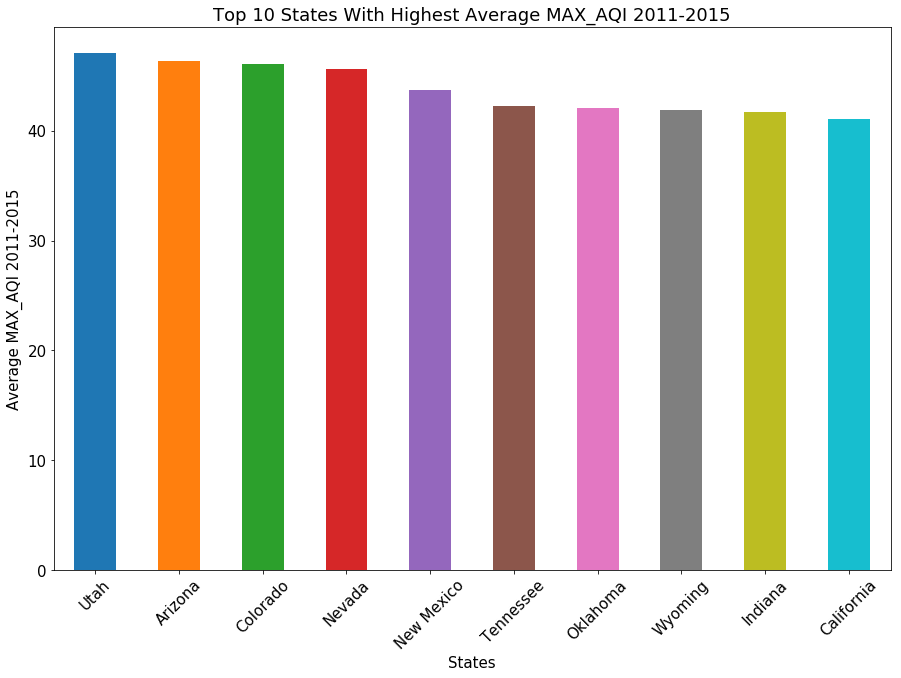

In [8]:
make_bar_plot(top_10_state, fontsize=15, figsize=(15, 10), ylabel='Average MAX_AQI 2011-2015',
              title='Top 10 States With Highest Average MAX_AQI 2011-2015')
plt.show()

## 3.2 US VS CA

In [9]:
#ydf: USA data from 2011-2015
#CA_ydf: data from 2011-2015
CA_ydf = ydf.loc[df.State == 'California']
CA_ydf.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,MAX_AQI,EPA
1081788,9406,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,...,0.7,0,0.0,Parts per million,0.156522,0.2,0,NaN,18.0,Good
1081789,9407,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,...,0.7,0,0.0,Parts per million,0.150000,0.2,15,2.0,18.0,Good
1081790,9408,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,...,0.7,2,NaN,Parts per million,0.156522,0.2,0,NaN,18.0,Good
1081791,9409,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-01,Parts per billion,...,0.7,2,NaN,Parts per million,0.150000,0.2,15,2.0,18.0,Good
1081792,9410,6,1,11,1100 21st Street,California,Alameda,Oakland,2011-01-02,Parts per billion,...,0.6,0,0.0,Parts per million,0.113043,0.2,0,NaN,20.0,Good


In [10]:
CA_ydf.loc[CA_ydf.EPA== "Very Unhealthy", "EPA"] = "Unhealthy"
ydf.loc[ydf.EPA== "Very Unhealthy", "EPA"] = "Unhealthy"
CA_ydf.EPA.value_counts()

C:\Users\isabel\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Good                              147874
Moderate                           19742
Unhealthy for Sensitive Groups      4706
Unhealthy                            788
Name: EPA, dtype: int64

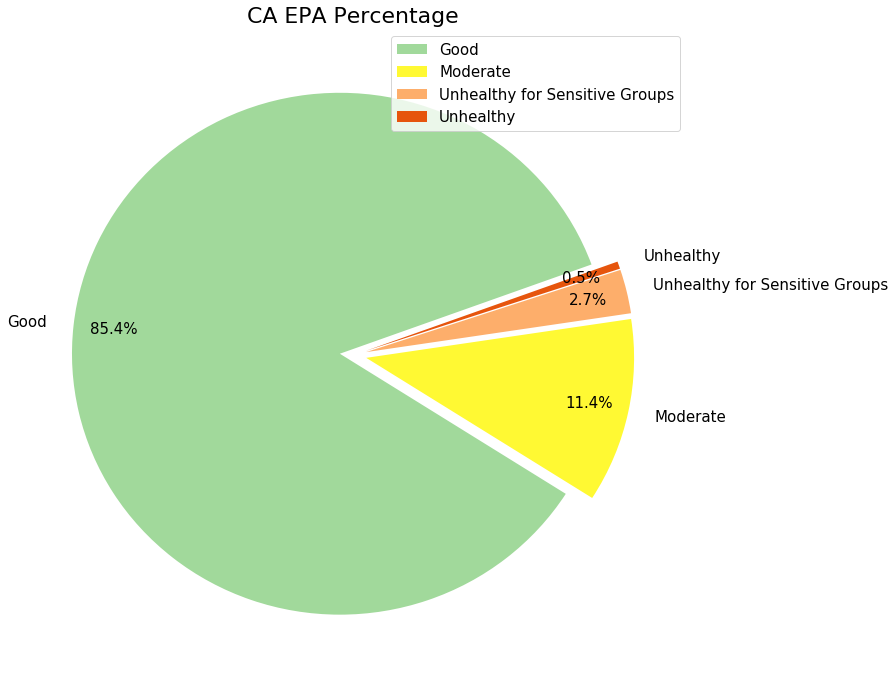

In [11]:
#CA_ydf.EPA pie chart
plot32(CA_ydf.EPA.value_counts(), 'CA EPA Percentage')

In [12]:
ydf.EPA.value_counts()

Good                              571411
Moderate                           68284
Unhealthy for Sensitive Groups      9006
Unhealthy                            974
Name: EPA, dtype: int64

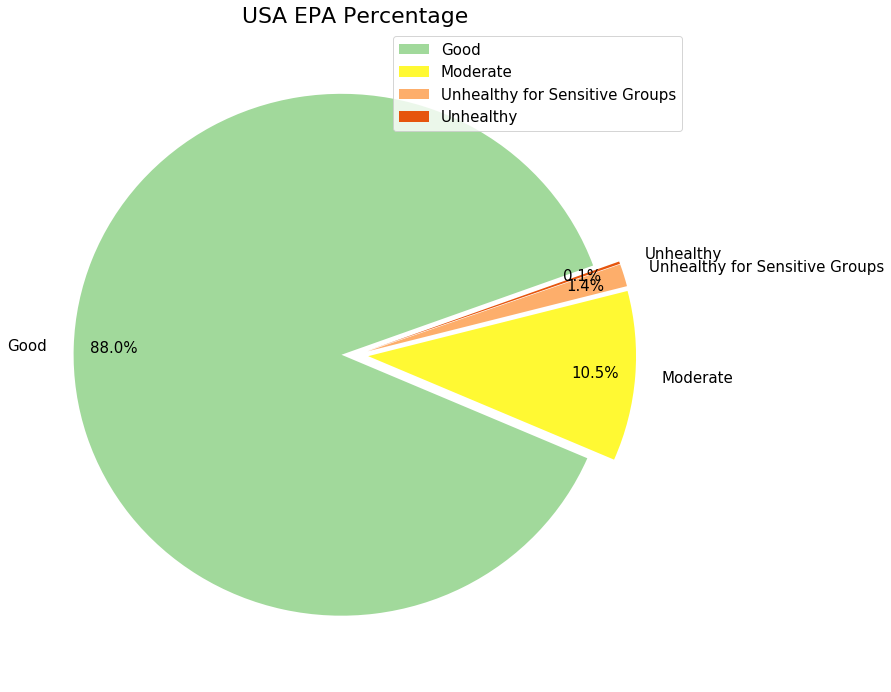

In [13]:
#US.EPA pie chart
plot32(ydf.EPA.value_counts(),'USA EPA Percentage')

## 3.3 Number of recorded year for per state

In [14]:
df['Year'] = df['Date Local'].dt.year
A = df.groupby(['State','Year'])['Year'].count()
len_year = A.groupby('State').count()
len_year.head()

State
Alabama        4
Alaska         2
Arizona       17
Arkansas      10
California    17
Name: Year, dtype: int64

In [15]:
#Abbreviating the name of the States to make the plot cleaner
len_year.index=abbreviation(len_year.index)

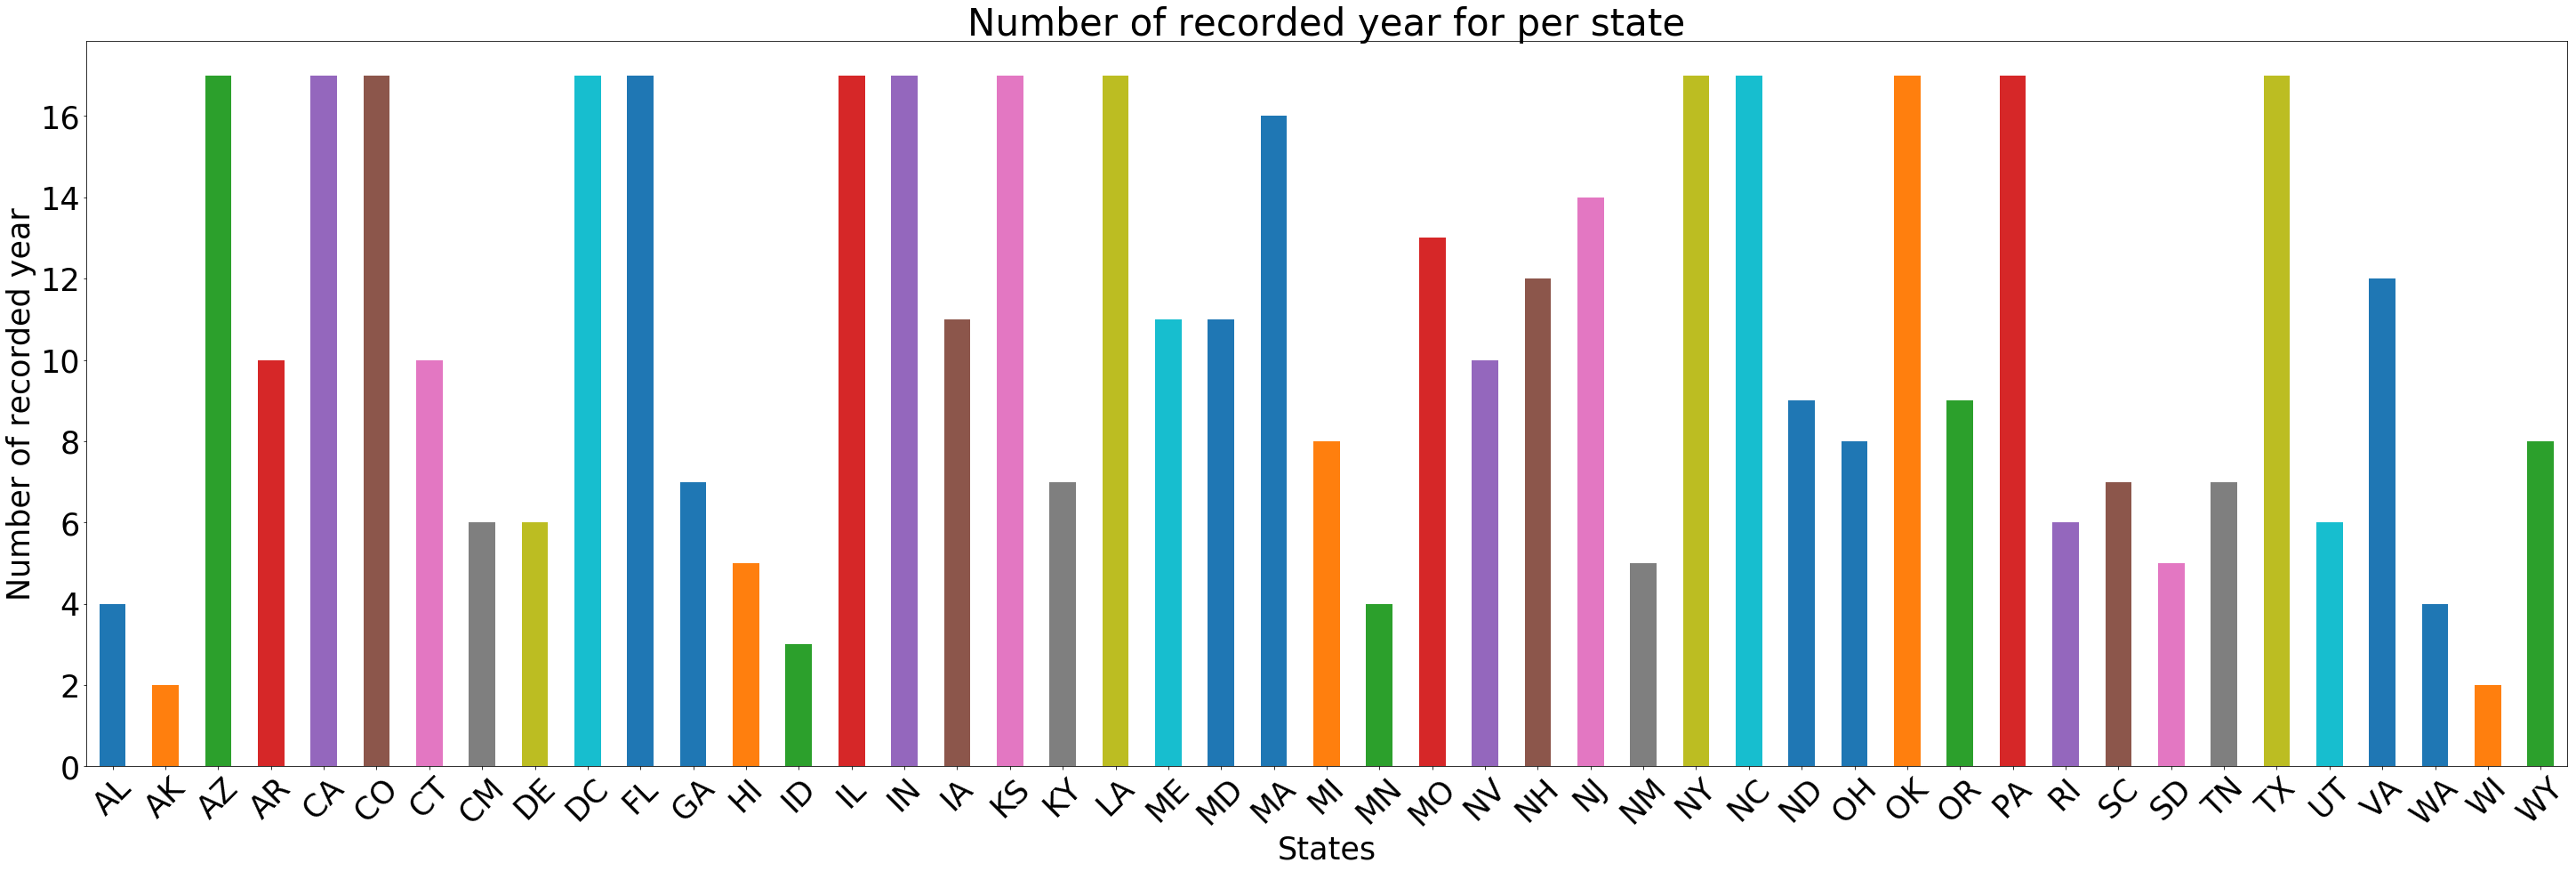

In [16]:
make_bar_plot(len_year, fontsize=35, figsize=(50, 15), ylabel='Number of recorded year',
              title='Number of recorded year for per state')

In [17]:
CA_df_states=df.loc[df['State'] == "California"]
CA_EPA, CA_EPA_column = make_df_and_column(CA_df_states, classifications, -1, 
                                           drop_2016=True)

EPA percentage TOP polluted city in CA

In [18]:
Cities_CA=['Los Angeles', 'Long Beach', 'San Diego', 'Fresno']
Cities_CA_df =  df.loc[df['City'].isin(Cities_CA)]
Top_CA_EPA, Top_CA_EPA_column = make_df_and_column(Cities_CA_df, classifications, -1, 
                                                   drop_2016=True)

In [19]:
SD_EPA = CA_df_states.loc[df['City'] == "San Diego"]
SD_EPA, SD_EPA_column = make_df_and_column(SD_EPA, classifications, 3, 
                                           drop_2016=False, n_zeros=3)

EPA percentage LA

In [20]:
LA_EPA = CA_df_states.loc[df['City'] == "Los Angeles"]
LA_EPA, LA_EPA_column = make_df_and_column(LA_EPA, classifications, 4, 
                                           drop_2016=False)

EPA percentage Fresno

In [21]:
F_EPA = CA_df_states.loc[df['City'] == "Fresno"]
F_EPA, F_EPA_column = make_df_and_column(F_EPA, classifications, 5, 
                                         drop_2016=True, n_zeros=5)

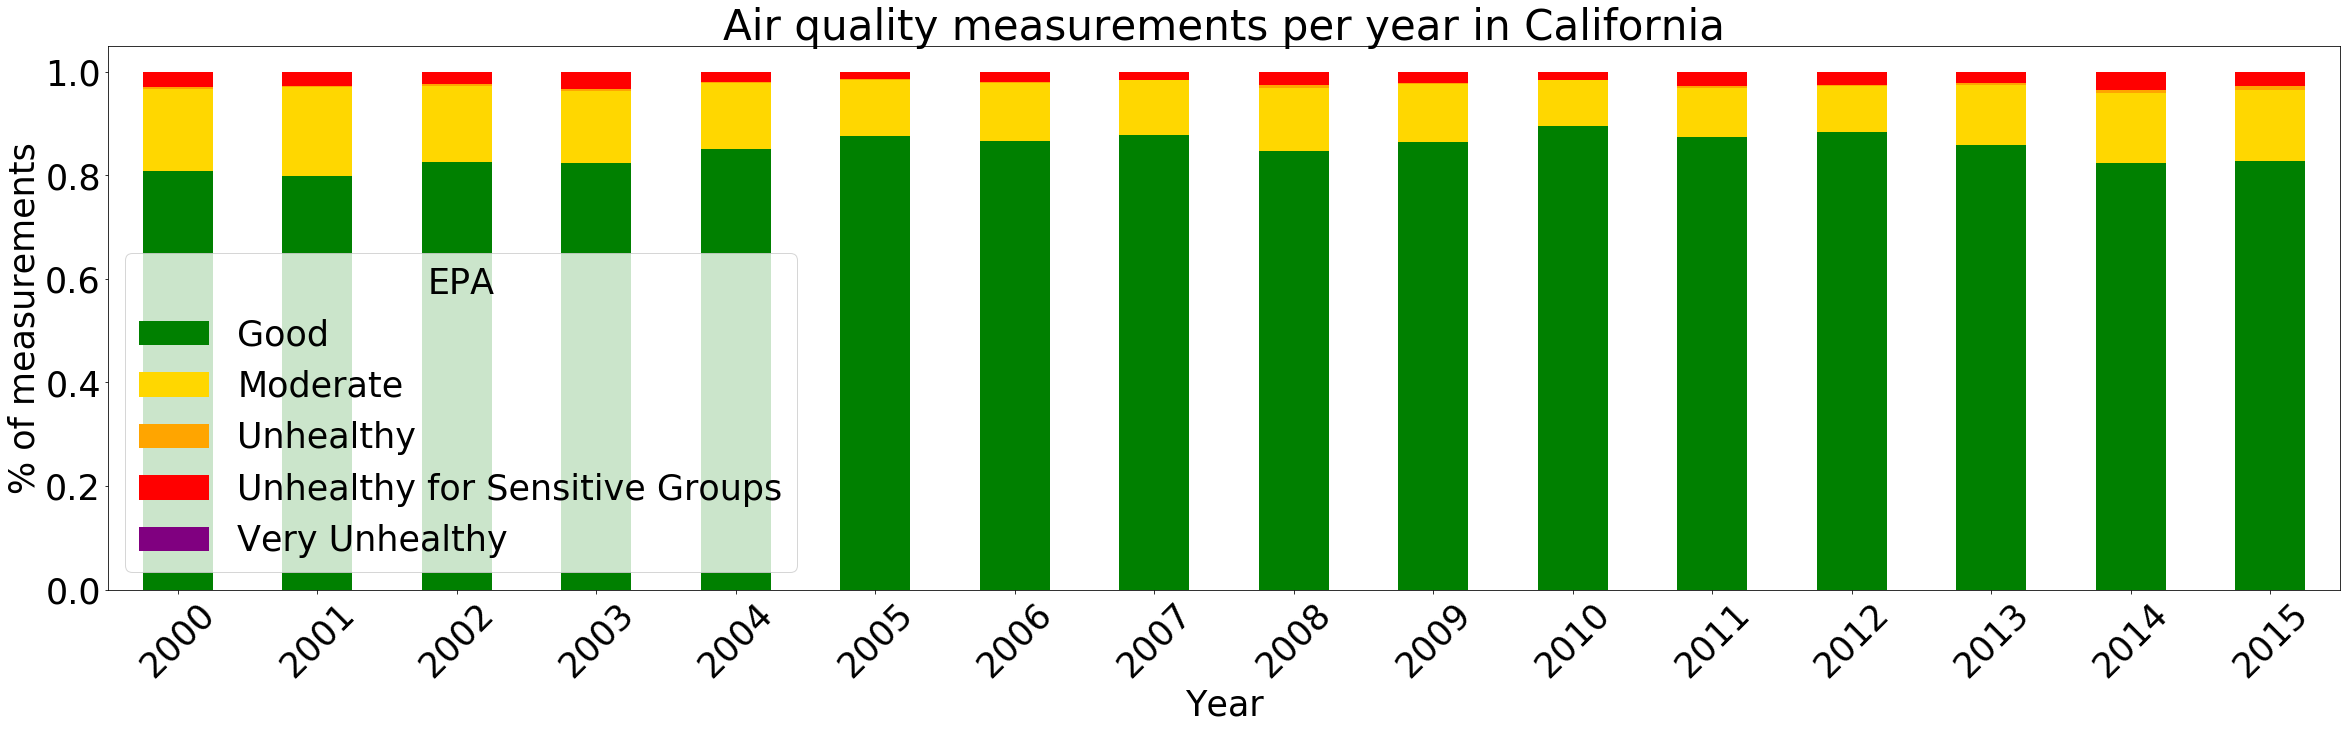

In [22]:
plot34(CA_EPA, CA_EPA_column,"California")

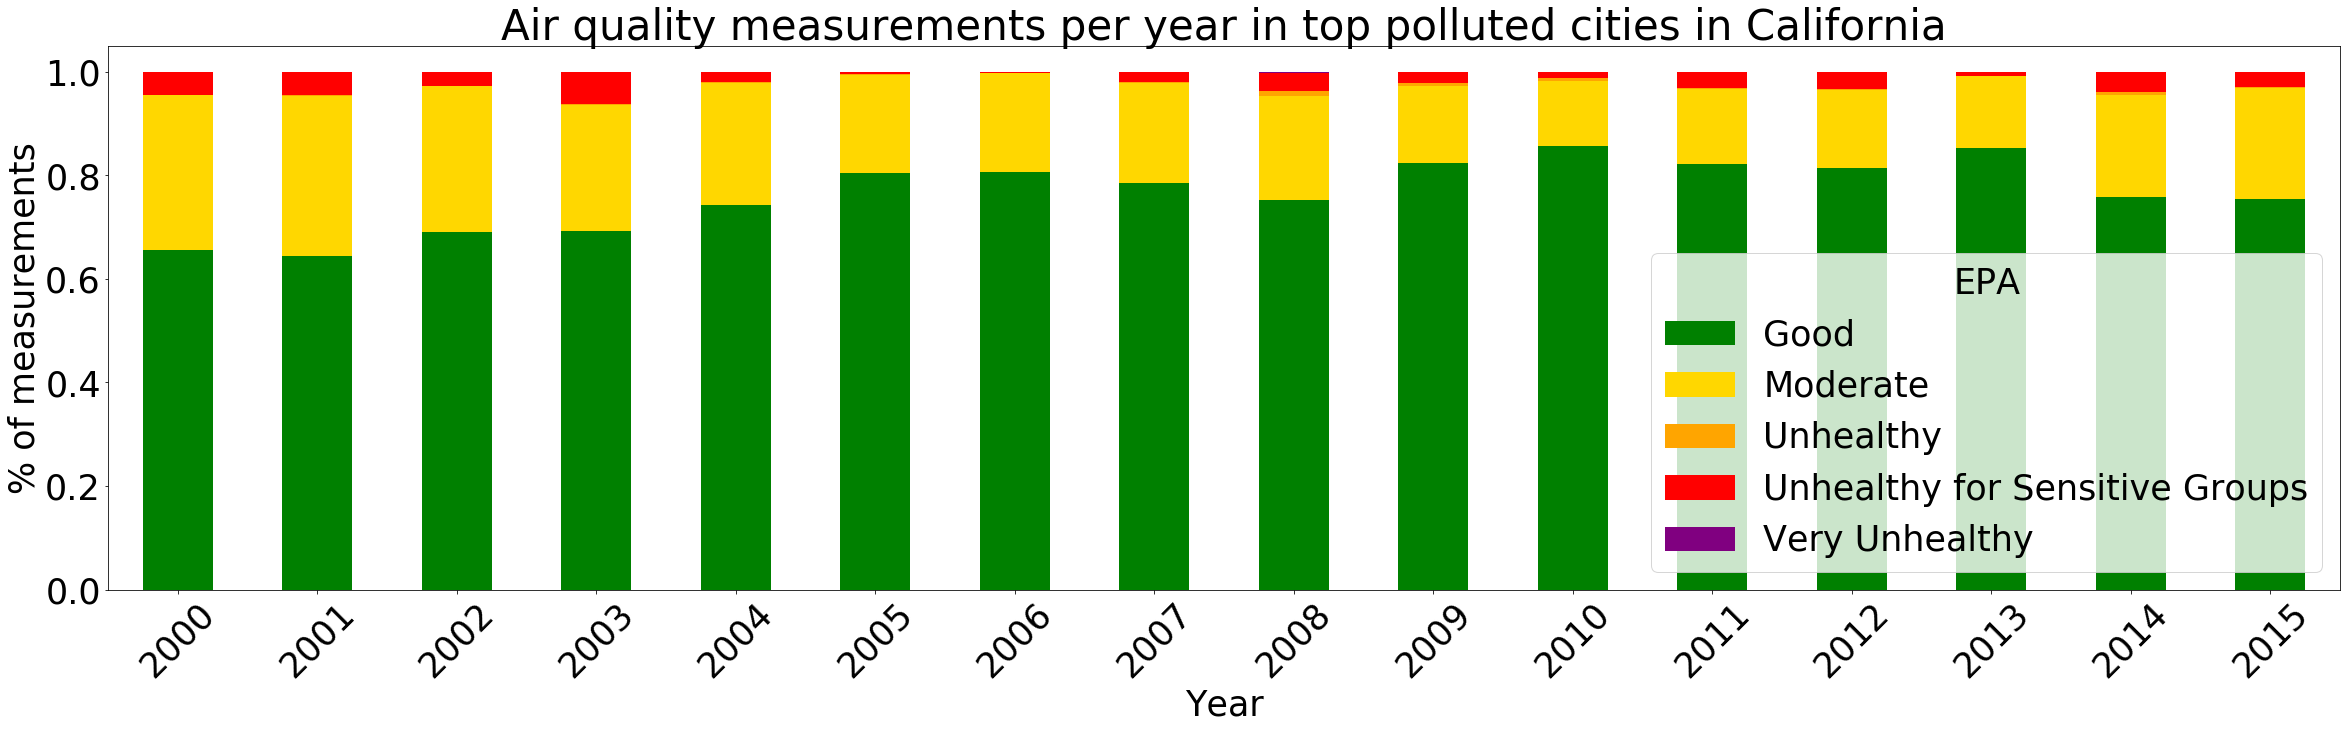

In [23]:
plot34(Top_CA_EPA, Top_CA_EPA_column, "top polluted cities in California")

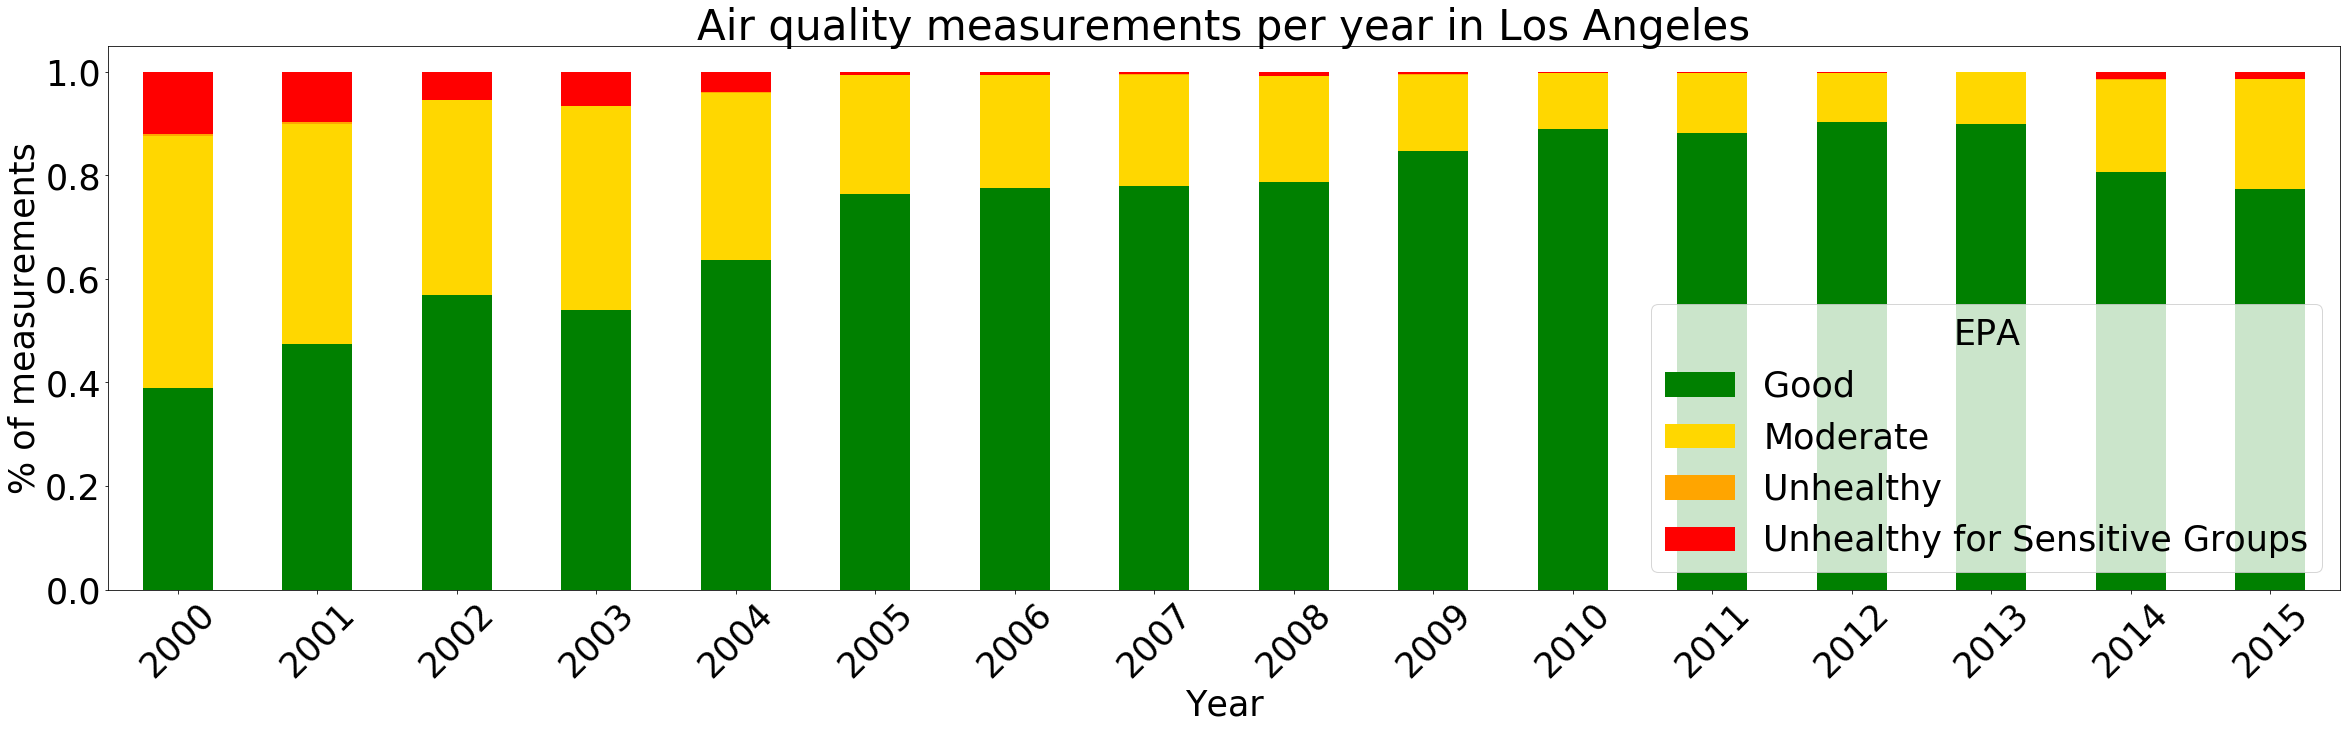

In [24]:
plot34(LA_EPA,LA_EPA_column,"Los Angeles")

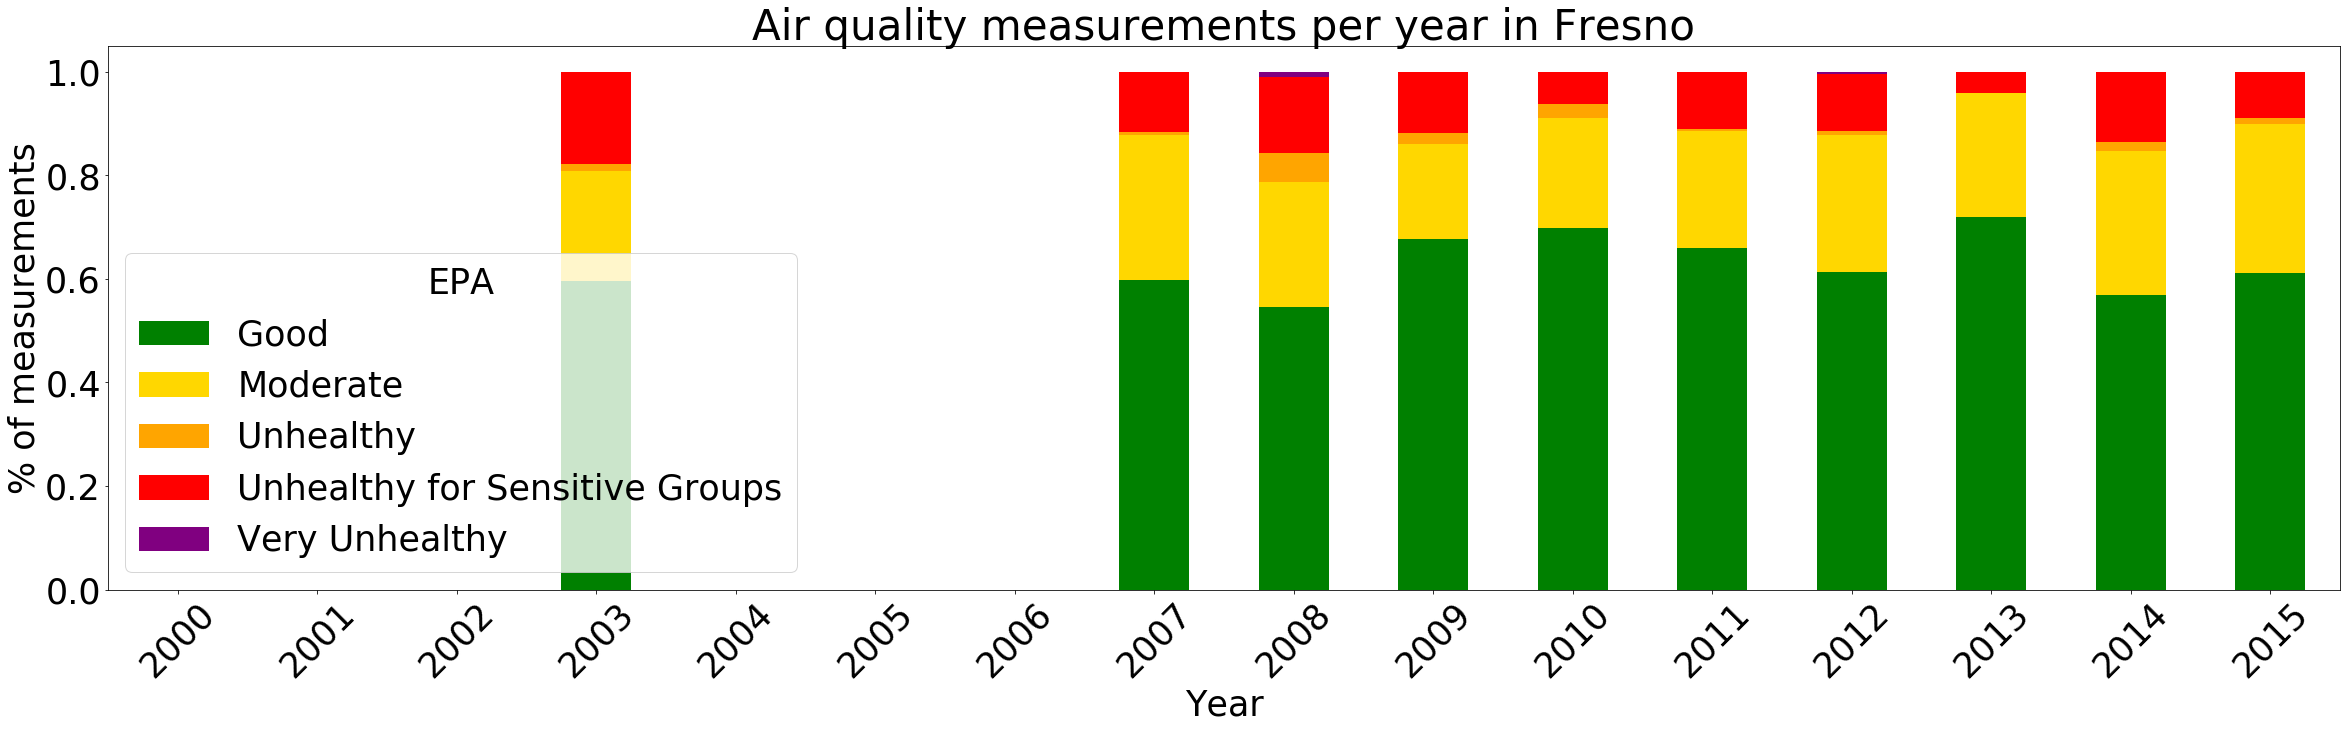

In [25]:
plot34(F_EPA, F_EPA_column,"Fresno")

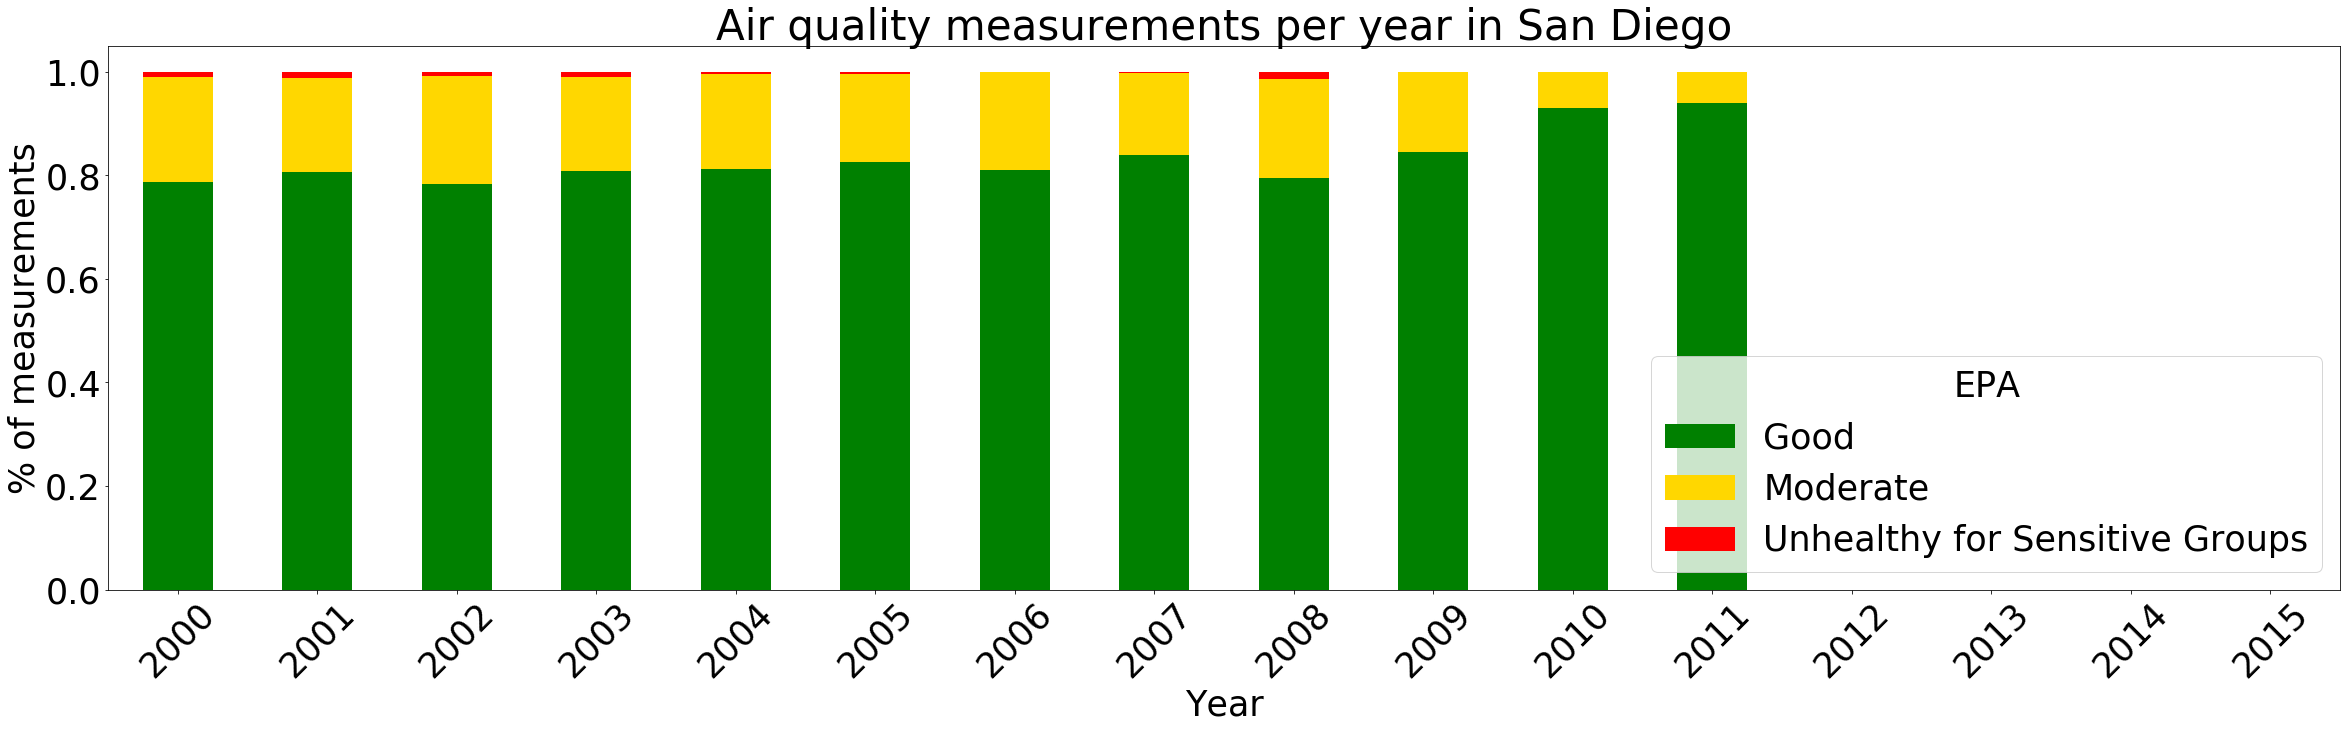

In [26]:
plot34(SD_EPA, SD_EPA_column,"San Diego")

## 3.5 AQI pollutant measurements in the most polluted cities in CA over time

In [27]:
Cities_CA=['Los Angeles', 'Long Beach', 'San Diego', 'Fresno','Carlsbad']
Cities_CA_df =  df.loc[df['City'].isin(Cities_CA)]
Cities_CA_df = Cities_CA_df[(Cities_CA_df['Date Local'].dt.year <= 2011) & (Cities_CA_df['Date Local'].dt.year >= 2007)]

In [28]:
aves = {}
for AQI in AQIs:
    aves[AQI.replace(" AQI", "")] = get_average(Cities_CA_df, AQI)

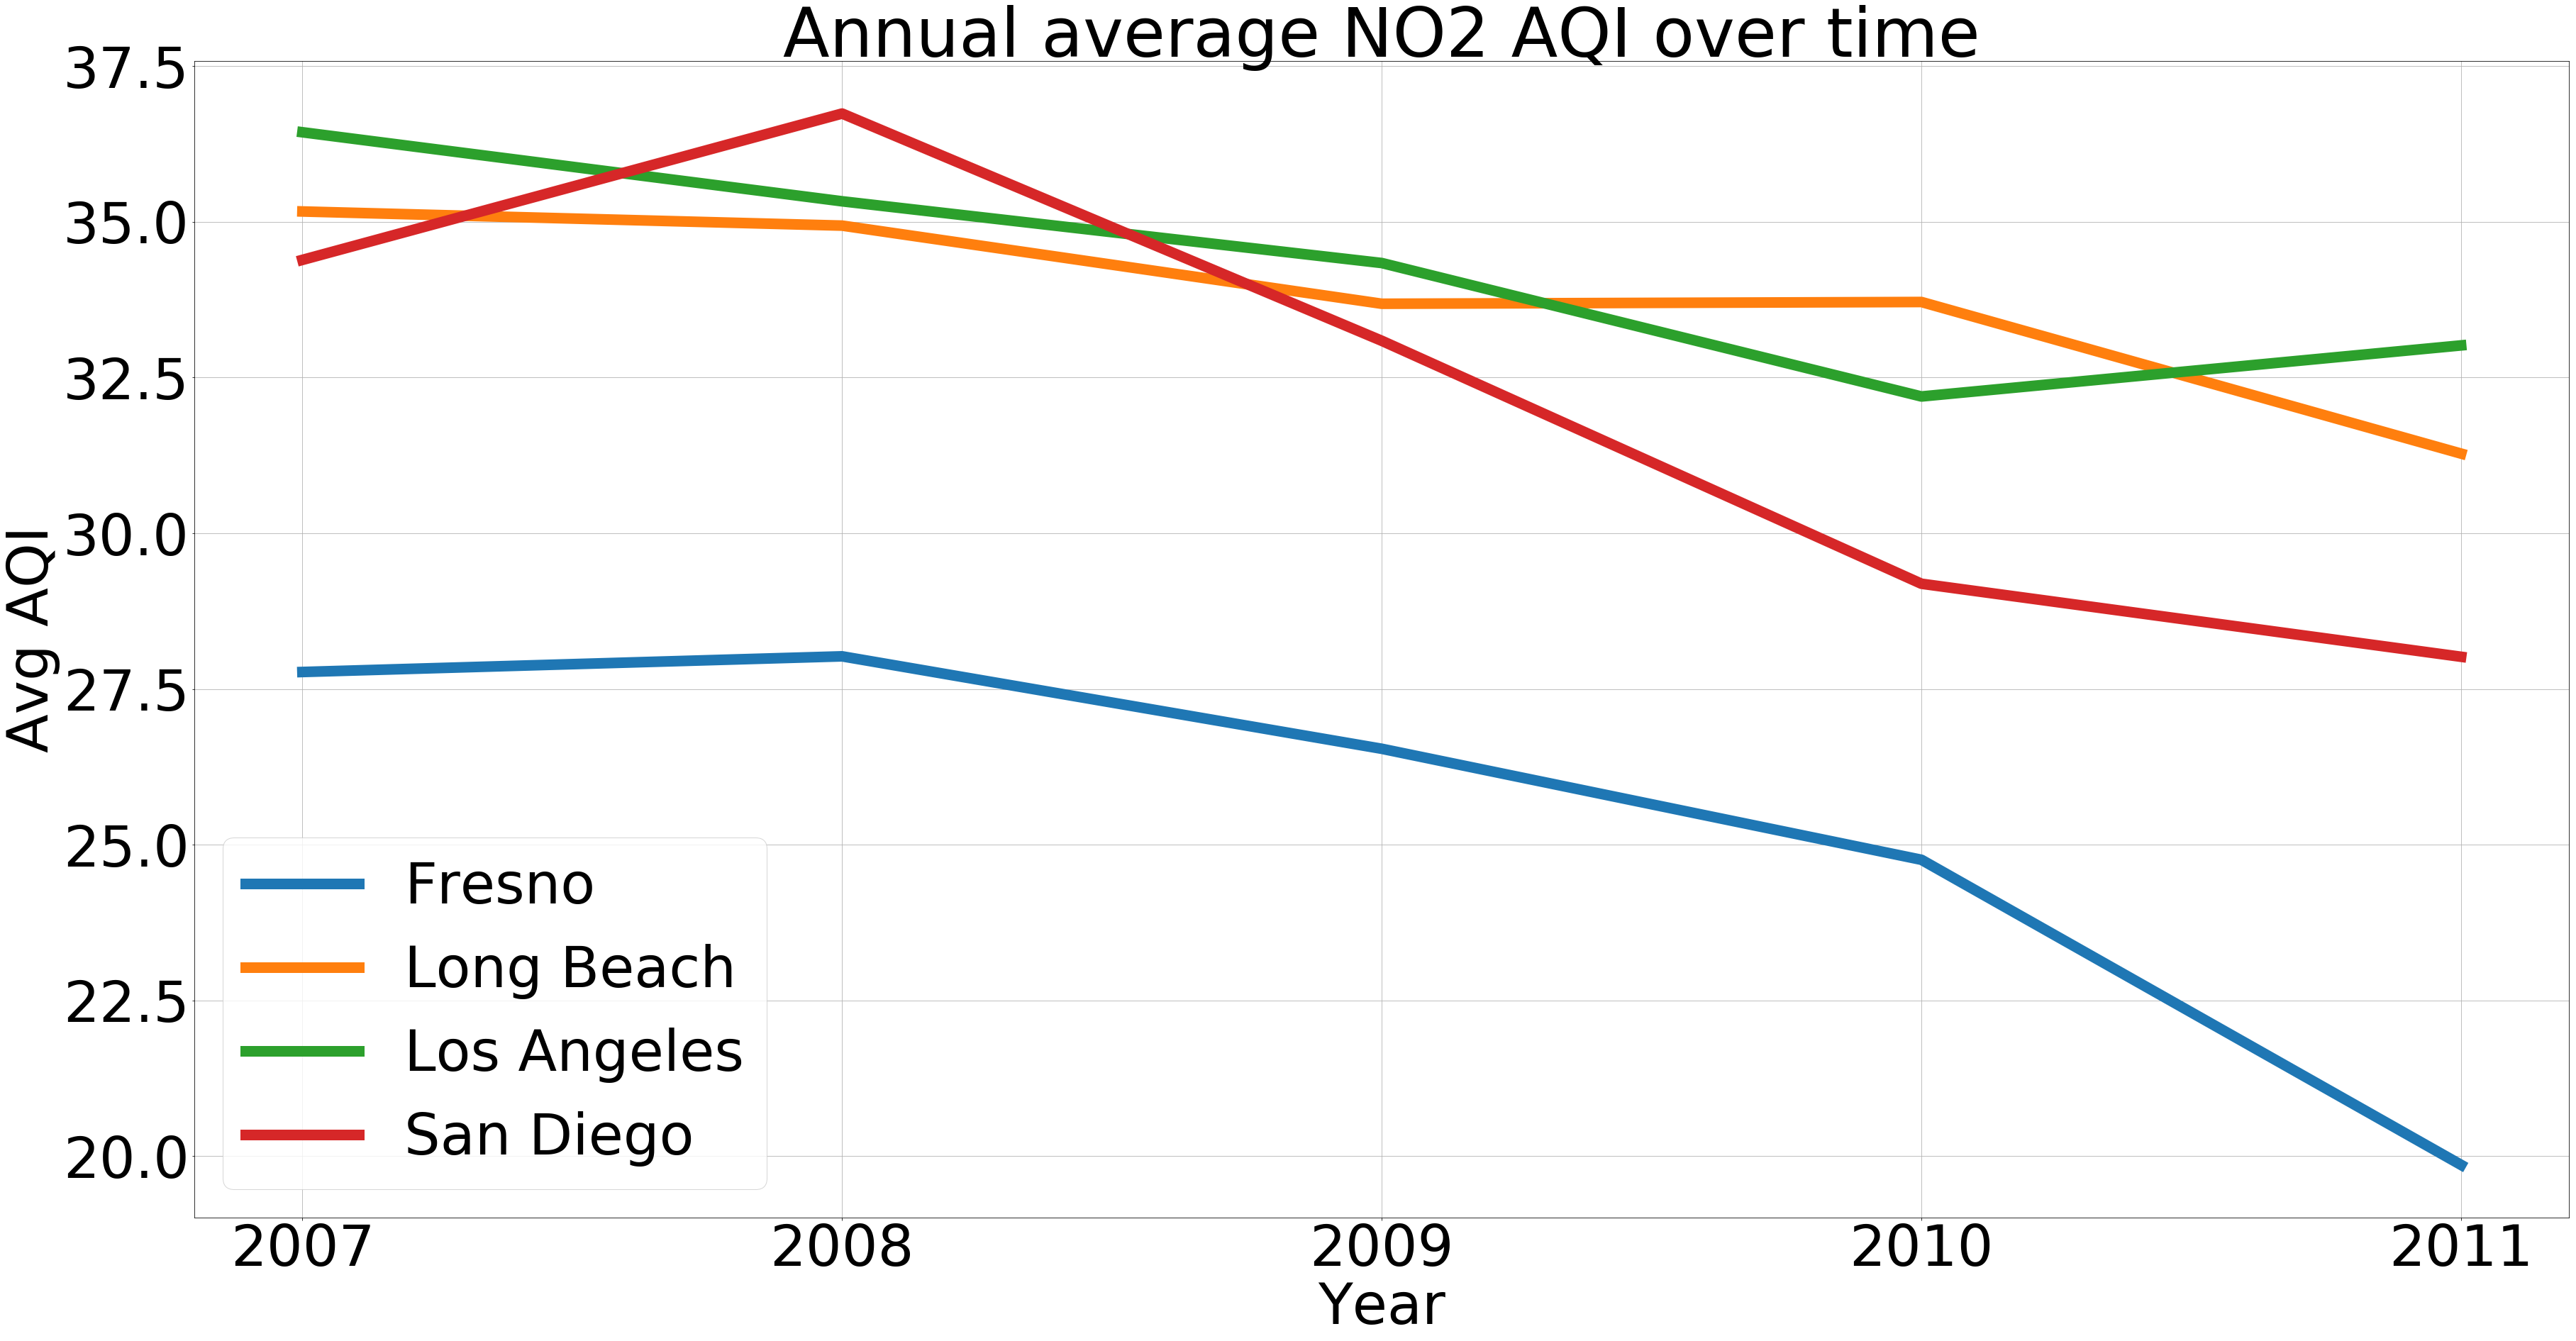

In [29]:
plot35(aves["NO2"], "NO2")

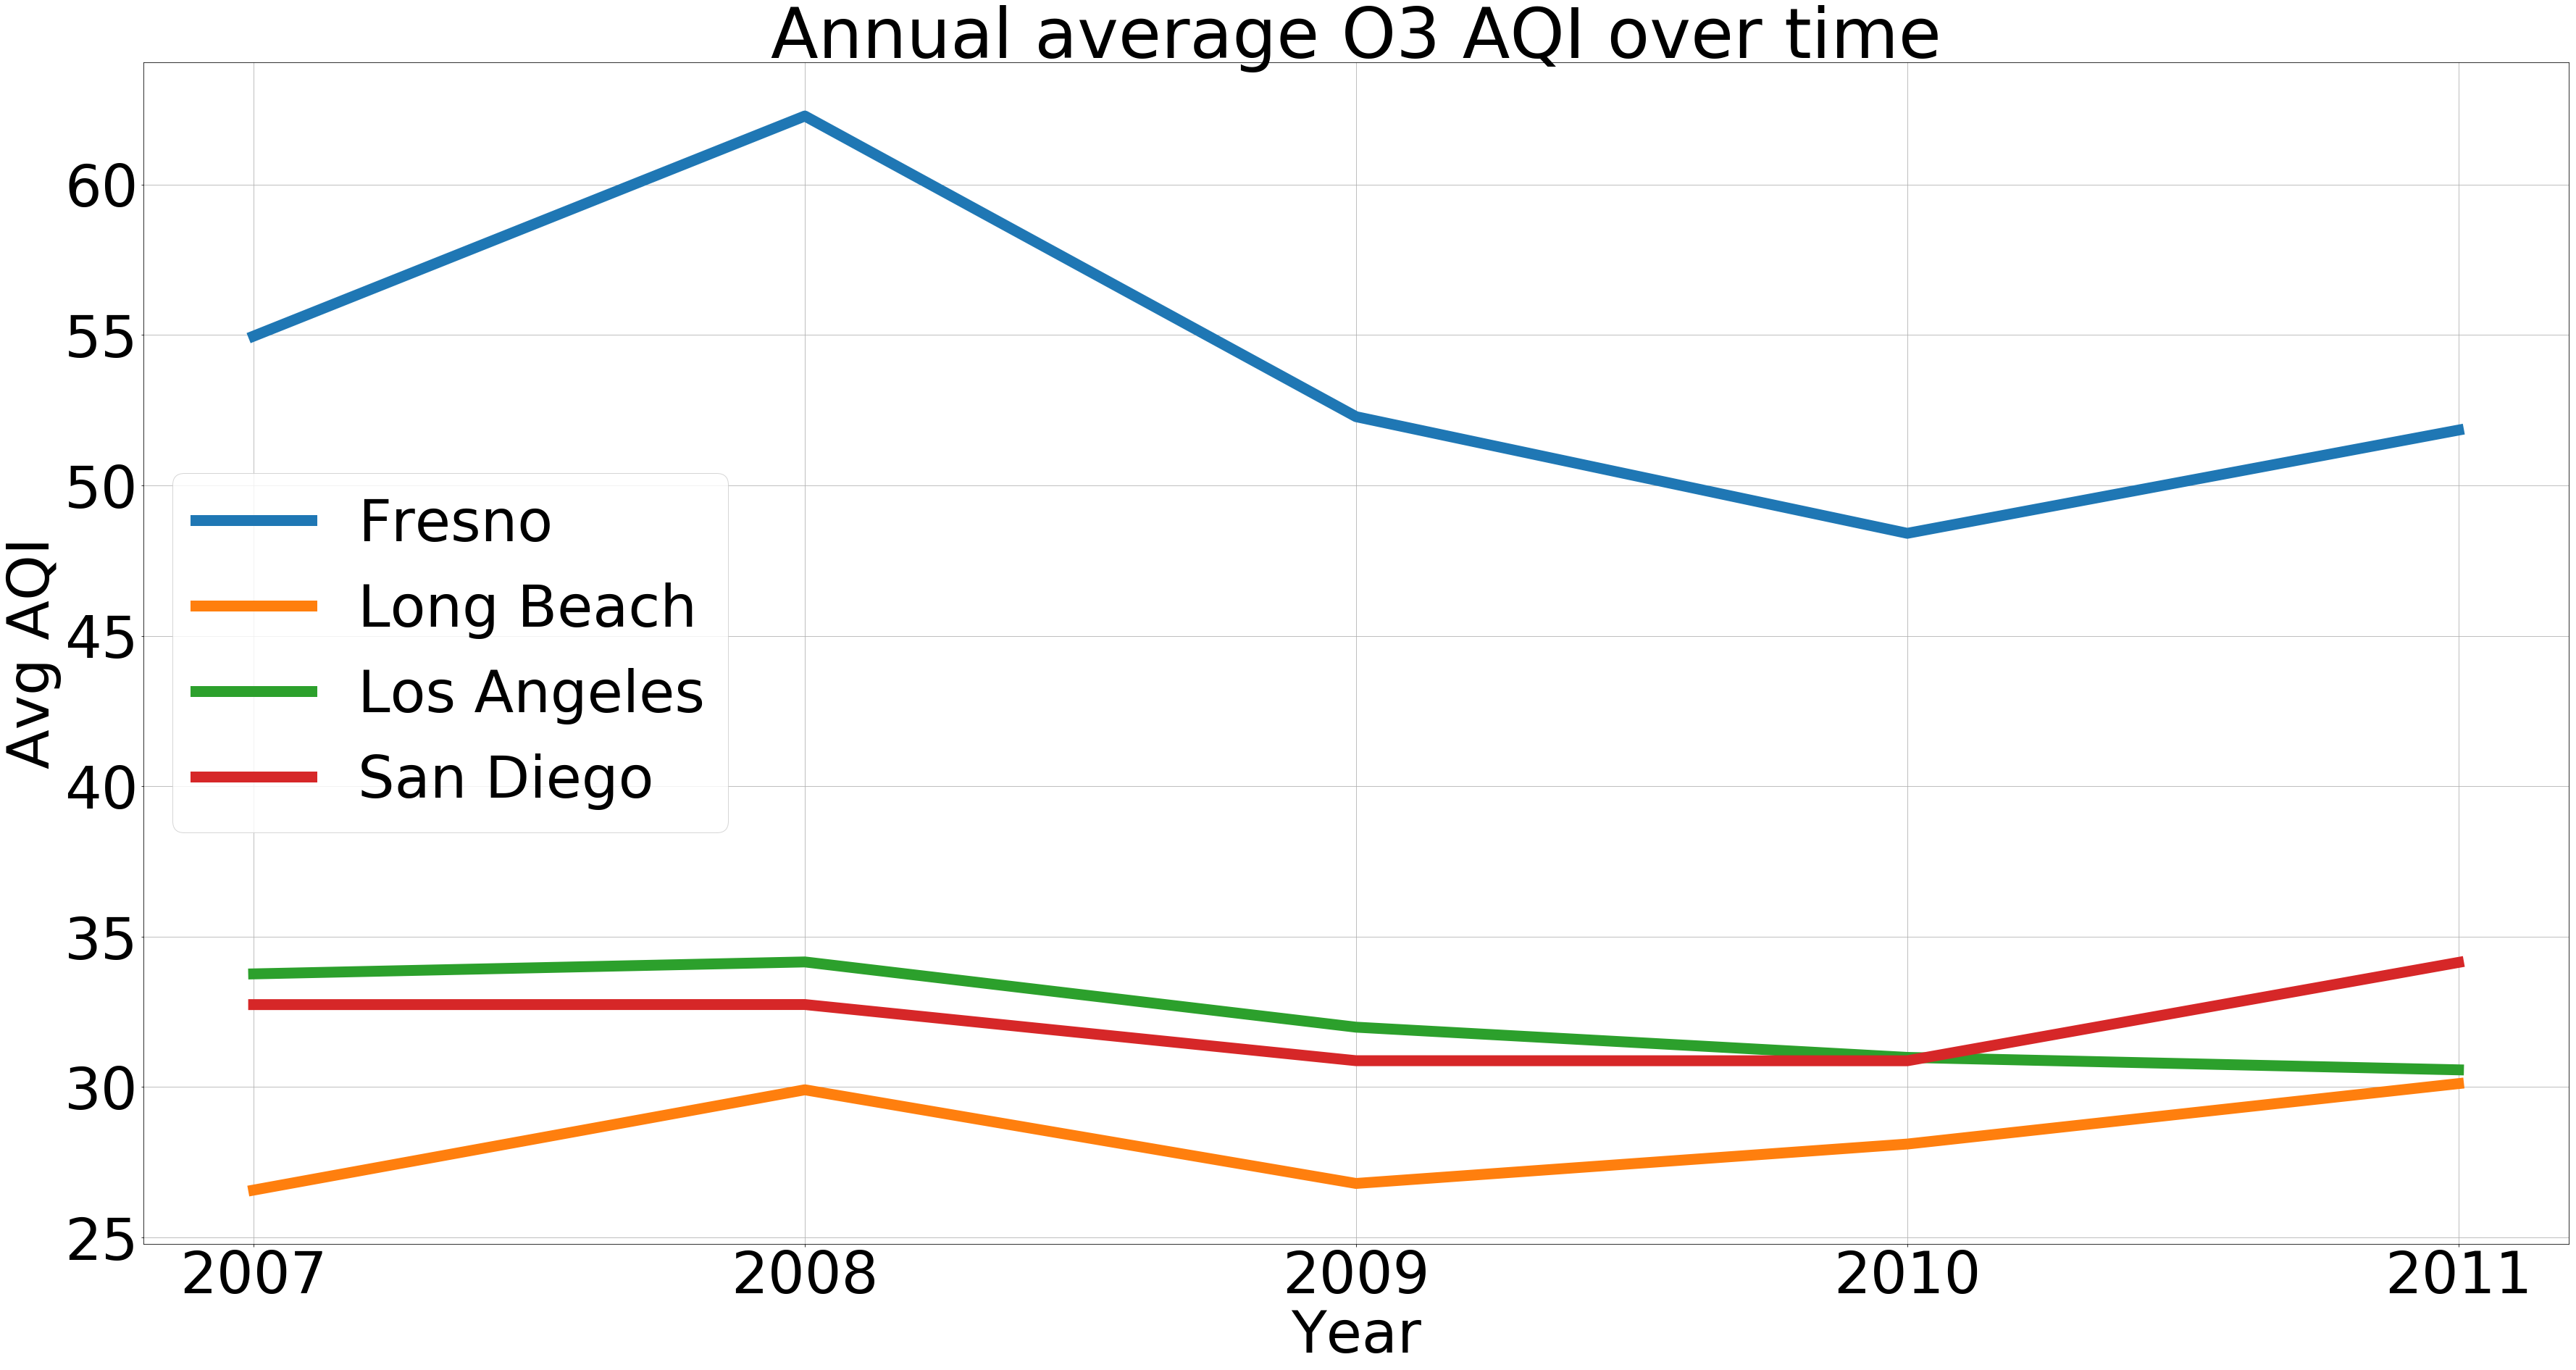

In [30]:
plot35(aves["O3"], "O3")

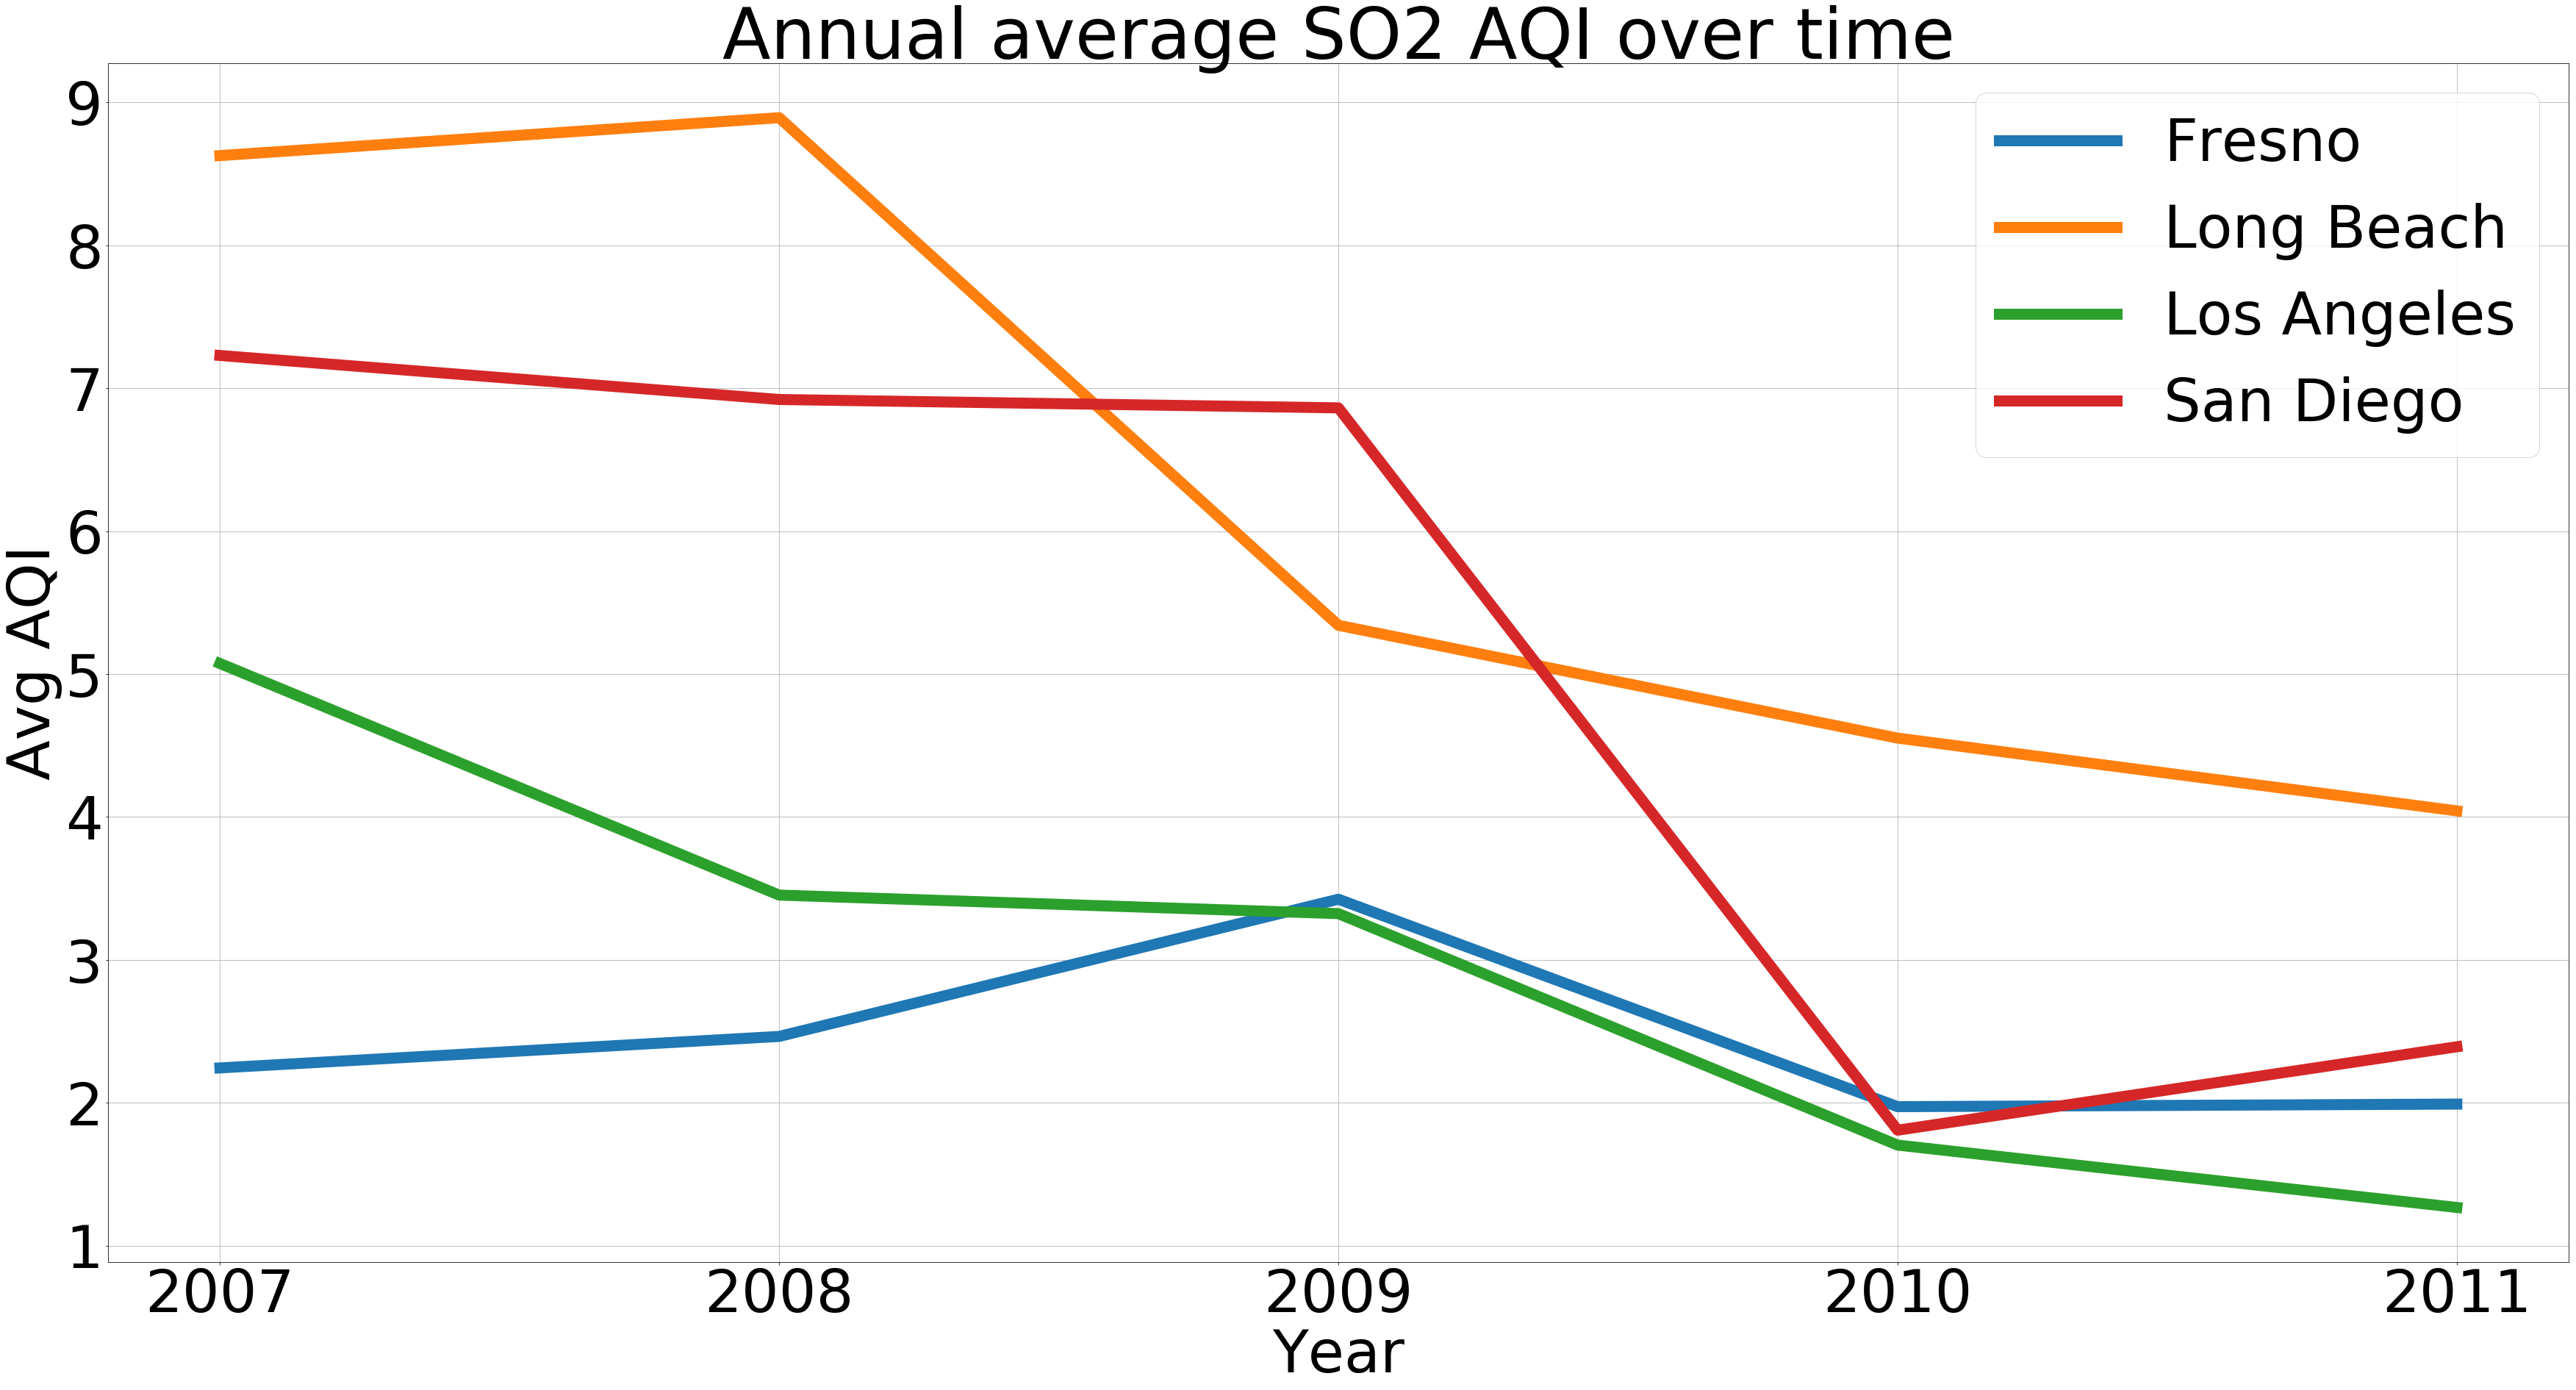

In [31]:
plot35(aves["SO2"], "SO2")

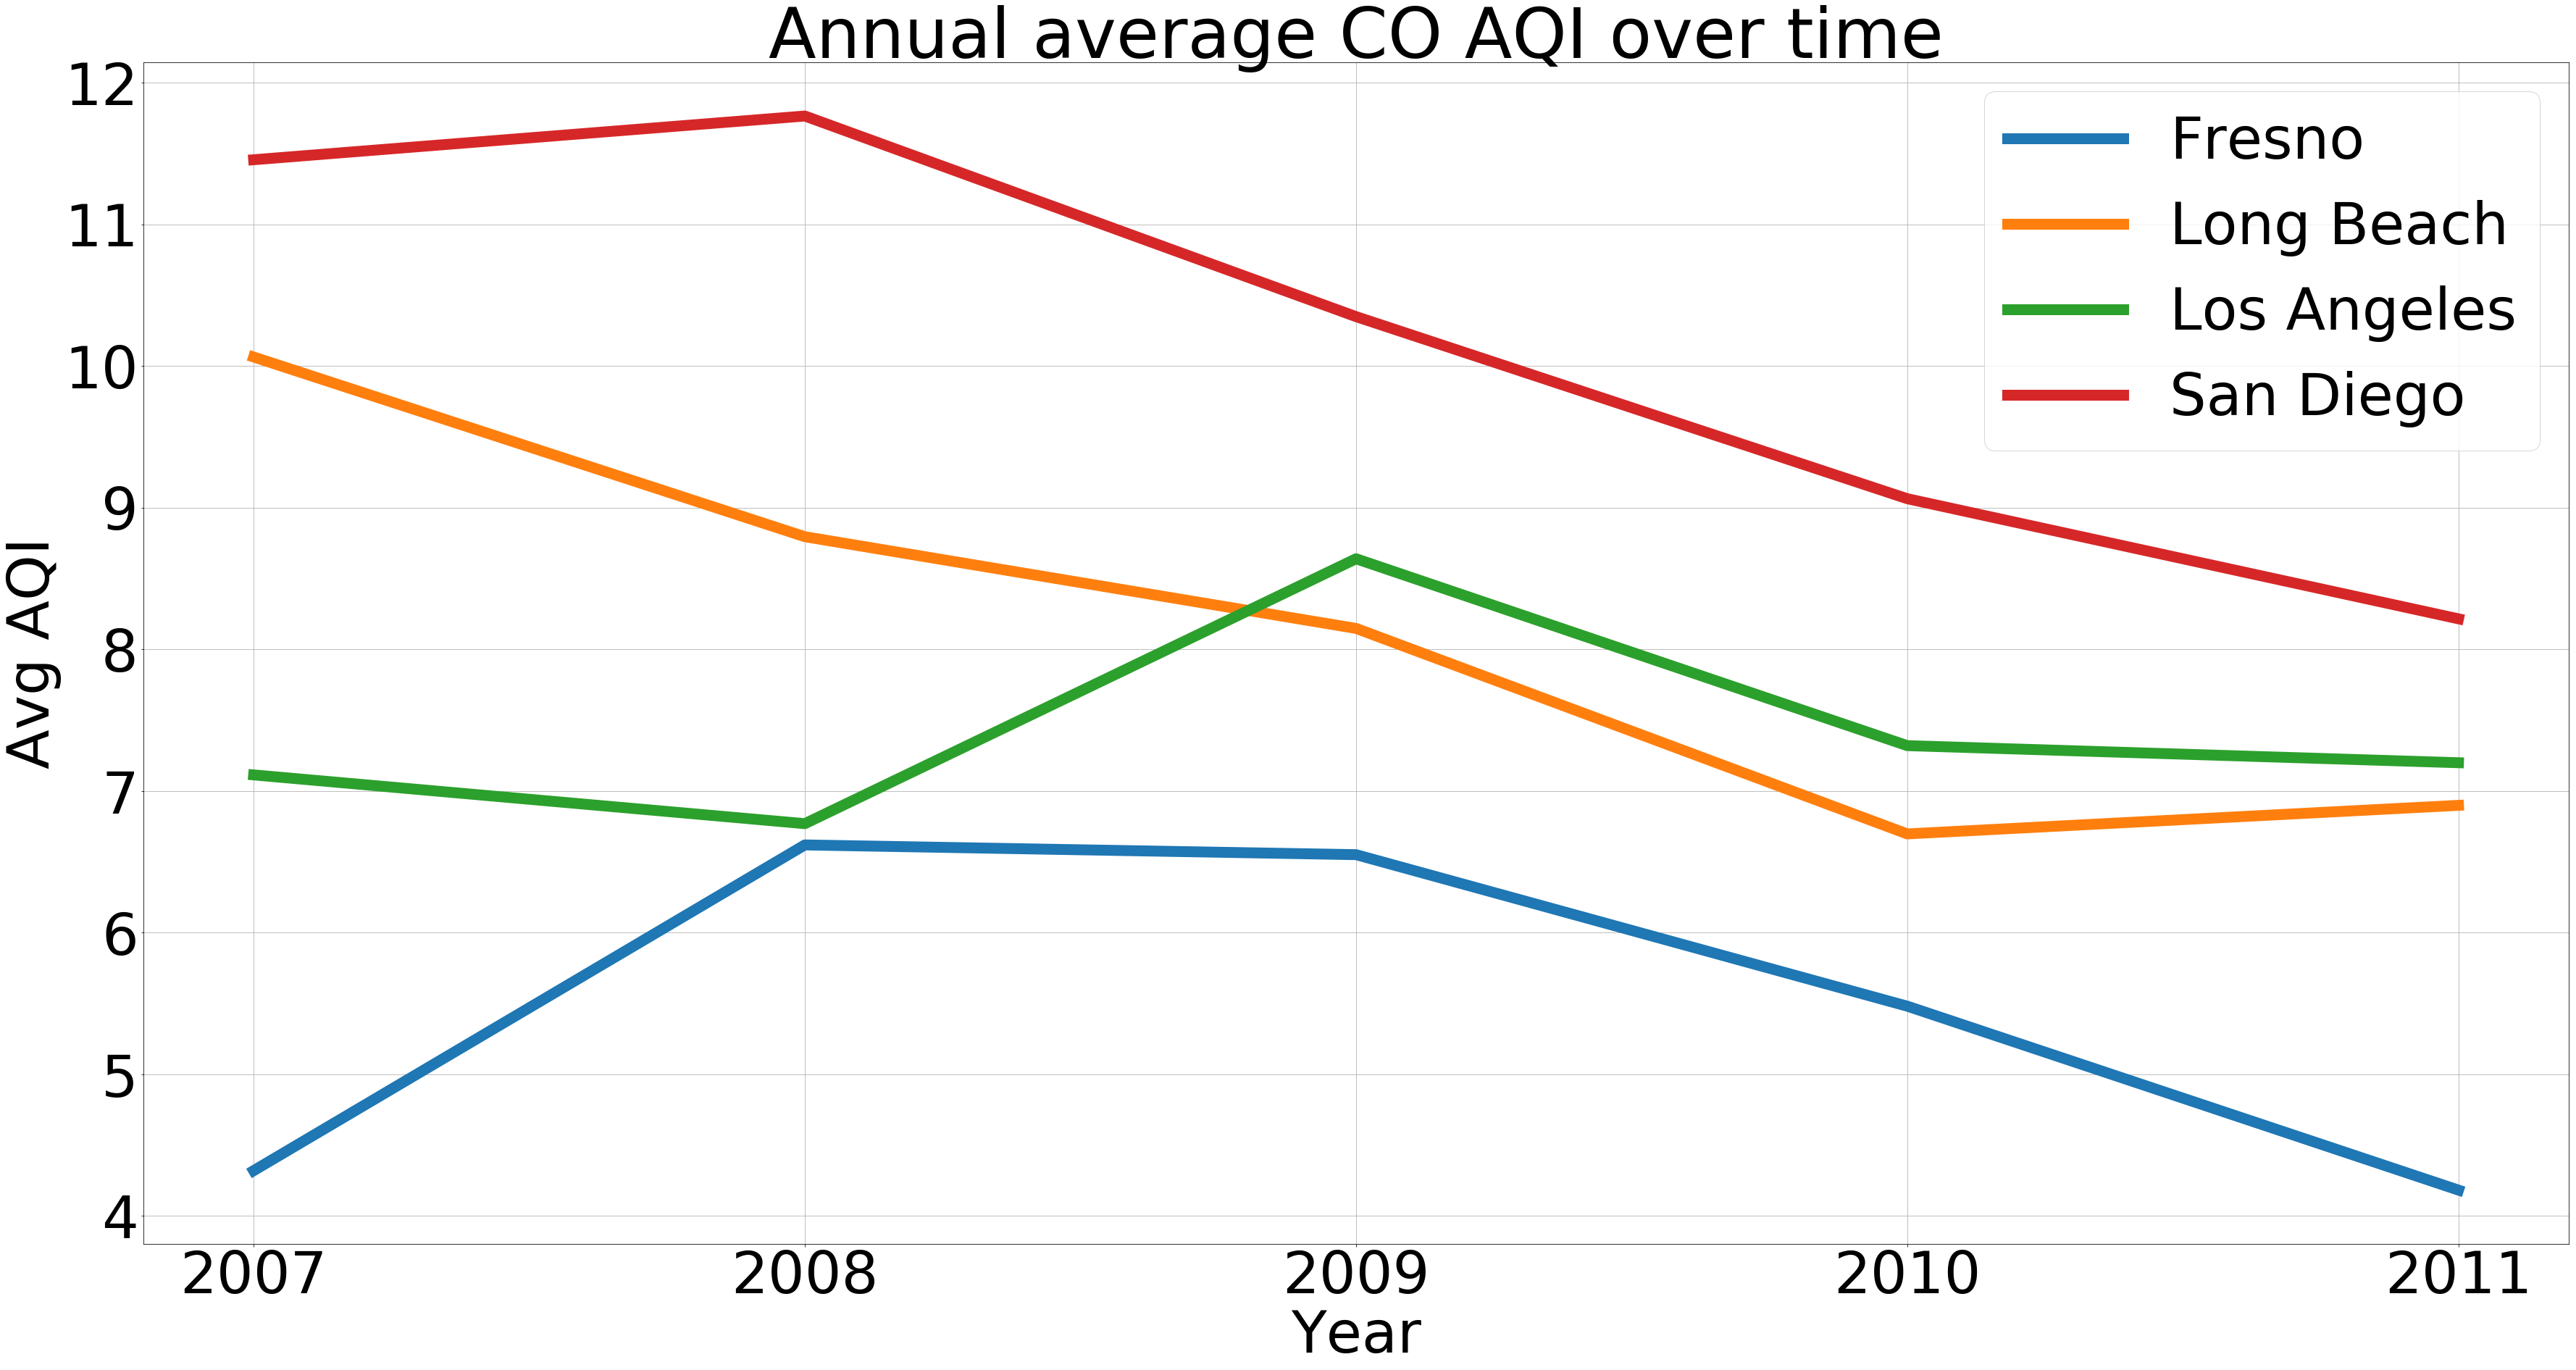

In [32]:
plot35(aves["CO"], "CO")

## 3.6 Pollutant composition analysis

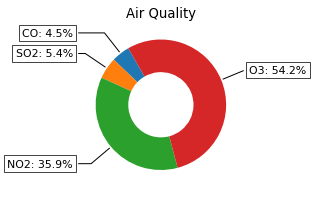

In [33]:
air_sums = []
data = []
all_air_sum = 0
for AQI in AQIs:
    air_sum = df[AQI].sum()
    air_sums.append(air_sum)
    all_air_sum += air_sum

data = [(air_sum/all_air_sum)*100 for air_sum in air_sums]
to_plot  = {}
for d, AQI in zip(data, AQIs):
    value = "{0}: {1:.1f}%".format(AQI.replace(" AQI", ""), d)
    to_plot[d] = value
to_plot = OrderedDict((k, to_plot[k]) for k in sorted(to_plot))
plot36(list(to_plot.keys()), list(to_plot.values()))